In [1]:
import pandas as pd
import numpy as np
np.random.seed(1)
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
style.use('fivethirtyeight')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
# 0. Load in the data and split the descriptive and the target feature
df = pd.read_csv('Wine.txt',sep=',',names=['target','Alcohol','Malic_acid','Ash','Akcakinity','Magnesium','Total_pheonols','Flavanoids','Nonflavanoids','Proanthocyanins','Color_intensity','Hue','OD280','Proline'])
X = df.iloc[:,1:].copy()
target = df['target'].copy()
X_train, X_test, y_train, y_test = train_test_split(X,target,test_size=0.3,random_state=0)
#Visualization Before LDA
y = df['target']          # Split off classifications

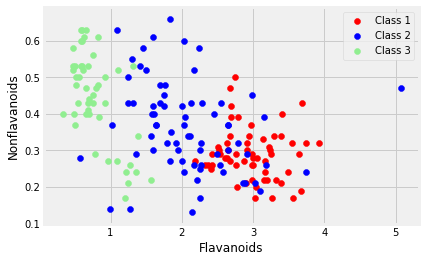

In [3]:
plt.scatter(X[y==1]['Flavanoids'], X[y==1]['Nonflavanoids'], label='Class 1', c='red')
plt.scatter(X[y==2]['Flavanoids'], X[y==2]['Nonflavanoids'], label='Class 2', c='blue')
plt.scatter(X[y==3]['Flavanoids'], X[y==3]['Nonflavanoids'], label='Class 3', c='lightgreen')

# Prettify the graph
plt.legend()
plt.xlabel('Flavanoids')
plt.ylabel('Nonflavanoids')

# display
plt.show()

In [10]:
# 1. Standardize the data
for col in X_train.columns:
    X_train[col] = StandardScaler().fit_transform(X_train[col].values.reshape(-1,1))
print(X_train)

      Alcohol  Malic_acid       Ash  Akcakinity  Magnesium  Total_pheonols  \
22   0.910831   -0.462599 -0.011426   -0.820679   0.062417        0.588204   
108 -0.956099   -0.966087 -1.537254   -0.147487  -0.554019        0.169986   
175  0.359522    1.675016 -0.374718    0.133010   1.363782       -1.118128   
145  0.221695    1.047864 -0.774340    0.413506   0.130910       -1.268687   
71   1.098777   -0.771758  1.114780    1.535493  -0.964977        1.156982   
162 -0.166726    0.782871  0.787817    0.694003   0.404881       -1.017756   
156  1.073717    1.533686  0.061232   -0.007239  -0.759498       -0.766824   
27   0.397112   -0.586263 -0.810669   -0.708480  -0.417033        0.236901   
83   0.083868    1.304025 -0.156743    0.834251  -1.033470       -1.017756   
134 -0.592737   -1.010252 -0.411048   -0.568232  -1.033470       -0.432249   
97  -0.868391   -0.860089 -1.391937   -0.988977  -1.033470        0.487832   
118 -0.266964    0.924201 -1.391937   -0.988977  -1.375934      

C:\Users\sinha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
# 2. Compute the mean vector mu and the mean vector per class mu_k
mu = np.mean(X_train,axis=0).values.reshape(13,1) # Mean vector mu --> Since the data has been standardized, the data means are zero 
mu_k = []
for i,orchid in enumerate(np.unique(df['target'])):
    mu_k.append(np.mean(X_train.where(df['target']==orchid),axis=0))
mu_k = np.array(mu_k).T

In [12]:
mu_k

array([[ 0.92586625, -0.87273822,  0.16370064],
       [-0.30912353, -0.38544438,  0.89290617],
       [ 0.2592266 , -0.44366976,  0.3248787 ],
       [-0.79894024,  0.24807052,  0.56577583],
       [ 0.30385444, -0.24090883, -0.00998986],
       [ 0.96083738, -0.10586799, -0.94988467],
       [ 1.05152135,  0.01874319, -1.22797915],
       [-0.63058306, -0.01640055,  0.74362712],
       [ 0.53539208,  0.10952058, -0.76520548],
       [ 0.22090961, -0.87962307,  0.97900417],
       [ 0.48549453,  0.43923615, -1.1697815 ],
       [ 0.79804628,  0.27761267, -1.30071064],
       [ 1.20171181, -0.70155967, -0.39120139]])

In [6]:
# 3. Compute the Scatter within and Scatter between matrices
data_SW = []
Nc = []
for i,orchid in enumerate(np.unique(df['target'])):
    a = np.array(X_train.where(df['target']==orchid).dropna().values-mu_k[:,i].reshape(1,13))
    data_SW.append(np.dot(a.T,a))
    Nc.append(np.sum(df['target']==orchid))
SW = np.sum(data_SW,axis=0)
SB = np.dot(Nc*np.array(mu_k-mu),np.array(mu_k-mu).T)

In [14]:
print(SW)
print(SB)

[[ 51.45101306   0.670318    -2.06258511  -3.47238501   4.84388869
    9.0901686    5.68687116  -2.41246623   1.10812187  18.65670392
    1.62444216  -1.12474241   5.56659679]
 [  0.670318    84.99305482   9.47473115  14.83445274  -7.89867542
    2.51390052   1.03042395  13.69191016   8.99868657  -6.65578513
  -16.78460821   7.3565464  -11.07769284]
 [ -2.06258511   9.47473115 107.97264694  62.55949709  14.26093065
   13.5860753   11.00744636  20.67291239   2.32277049  -2.34240043
    4.37462302  10.31171475  -3.64807231]
 [ -3.47238501  14.83445274  62.55949709  84.24878958   1.85151117
    5.27001803   6.27341911  14.78290279  -0.76047476  -5.43540683
    2.20501071  12.29673823  -4.9820588 ]
 [  4.84388869  -7.89867542  14.26093065   1.85151117 117.45959015
    7.05131981   4.79572529 -30.10855865  28.00924022   2.78008086
    6.00007813  -4.91405093  15.67292609]
 [  9.0901686    2.51390052  13.5860753    5.27001803   7.05131981
   54.9426362   27.24579247  -6.96515569  30.77187279

In [15]:
# 4. Compute the Eigenvalues and Eigenvectors of SW^-1 SB
eigval, eigvec = np.linalg.eig(np.dot(np.linalg.inv(SW),SB))
    
# 5. Select the two largest eigenvalues 
eigen_pairs = [[np.abs(eigval[i]),eigvec[:,i]] for i in range(len(eigval))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0],reverse=True)
w = np.hstack((eigen_pairs[0][1][:,np.newaxis].real,eigen_pairs[1][1][:,np.newaxis].real)) # Select two largest

In [9]:
eigvec

array([[-8.01703506e-02+0.00000000e+00j, -7.84411003e-01+0.00000000e+00j,
         3.59666115e-01+0.00000000e+00j,  3.73175816e-01+0.00000000e+00j,
         5.92981902e-01+0.00000000e+00j, -7.09295075e-01+0.00000000e+00j,
        -7.09295075e-01-0.00000000e+00j, -7.74102175e-01+0.00000000e+00j,
         6.08423938e-01+0.00000000e+00j,  6.08423938e-01-0.00000000e+00j,
         6.72804081e-01+0.00000000e+00j,  7.33877740e-01+0.00000000e+00j,
         7.33877740e-01-0.00000000e+00j],
       [ 3.56144262e-02+0.00000000e+00j,  1.38588768e-01+0.00000000e+00j,
         2.49495955e-01+0.00000000e+00j, -5.32905347e-01+0.00000000e+00j,
        -4.37202799e-02+0.00000000e+00j,  1.77233871e-01+1.62431548e-02j,
         1.77233871e-01-1.62431548e-02j,  1.77007003e-01+0.00000000e+00j,
        -1.13815387e-01-1.02122064e-01j, -1.13815387e-01+1.02122064e-01j,
        -1.91251210e-01+0.00000000e+00j, -1.65625822e-01-9.49227221e-02j,
        -1.65625822e-01+9.49227221e-02j],
       [-2.76838859e-02+0.00

In [16]:
np.shape(eigvec)

(13, 13)

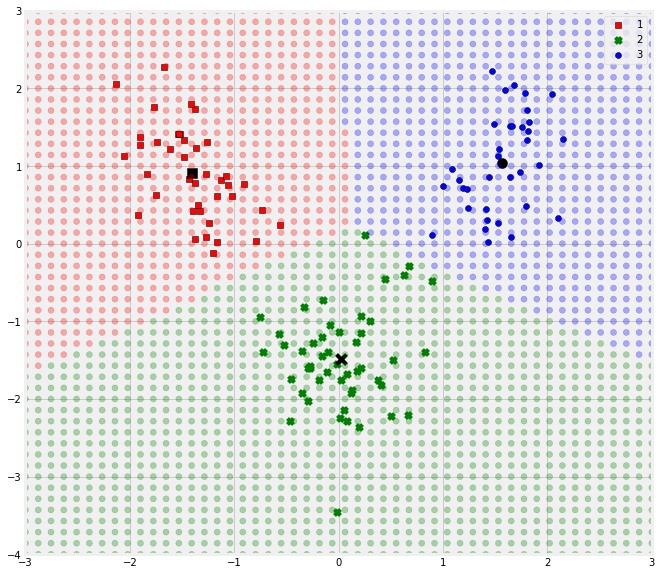

In [8]:
# 6. Transform the data with Y=X*w
Y = X_train.dot(w)
# Plot the data
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.set_xlim(-3,3)
ax0.set_ylim(-4,3)
for l,c,m in zip(np.unique(y_train),['r','g','b'],['s','x','o']):
    ax0.scatter(Y[0][y_train==l],
                Y[1][y_train==l],
               c=c, marker=m, label=l,edgecolors='black')
ax0.legend(loc='upper right')
means = []
for m,target in zip(['s','x','o'],np.unique(y_train)):
    means.append(np.mean(Y[y_train==target],axis=0))
    ax0.scatter(np.mean(Y[y_train==target],axis=0)[0],np.mean(Y[y_train==target],axis=0)[1],marker=m,c='black',s=100)
   
mesh_x, mesh_y = np.meshgrid(np.linspace(-3,3),np.linspace(-4,3)) 
mesh = []
for i in range(len(mesh_x)):
    for j in range(len(mesh_x[0])):
        date = [mesh_x[i][j],mesh_y[i][j]]
        mesh.append((mesh_x[i][j],mesh_y[i][j]))
NN = KNeighborsClassifier(n_neighbors=1)
NN.fit(means,['r','g','b'])        
predictions = NN.predict(np.array(mesh))
ax0.scatter(np.array(mesh)[:,0],np.array(mesh)[:,1],color=predictions,alpha=0.3)
plt.show()